In [277]:
# Artificial Neural Network

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [278]:
train.drop(['dropoff_datetime'], axis = 1, inplace=True)


In [215]:
train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude', 'pickup_long_round', 'pickup_lat_round', 'dropoff_long_round','dropoff_lat_round']].head(5)

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_long_round,pickup_lat_round,dropoff_long_round,dropoff_lat_round
657251,-73.947258,40.779968,-73.953255,40.778561,-73.95,40.78,-73.95,40.78
69199,-73.990585,40.760891,-73.919701,40.743172,-73.99,40.76,-73.92,40.74
642385,-73.987358,40.743095,-73.956955,40.771610,-73.99,40.74,-73.96,40.77
1197612,-73.983627,40.744091,-73.989227,40.735851,-73.98,40.74,-73.99,40.74
401031,-74.008591,40.711494,-73.776367,40.645271,-74.01,40.71,-73.78,40.65


In [279]:
dataset = train
dataset.loc[:, 'pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset.loc[:, 'month'] = dataset.pickup_datetime.dt.month
dataset.loc[:, 'hour'] = dataset.pickup_datetime.dt.hour
dataset.loc[:, 'weekday'] = dataset.pickup_datetime.dt.weekday
dataset.loc[:, 'day'] = dataset.pickup_datetime.dt.day
dataset.loc[:, 'quarter'] = np.ceil((dataset.pickup_datetime.dt.minute)/15)


# convert some of the numerical data to categories
dataset.loc[:, 'store_and_fwd_flag'] = dataset['store_and_fwd_flag'].replace(to_replace = ['N', 'Y'], value = [0,1])
dataset.loc[:, 'passenger_count'] = dataset['passenger_count'].replace(to_replace= [0,1,2,3,4,5,6,7,8,9], value = ['a', 'b', 'c' \
                                                                                                                  , 'd', 'e', 'f', 'g',\
                                                                                                                  'h', 'i', 'j'])

In [280]:
import math

dataset.loc[:, 'manhattan_dist'] = abs(dataset['pickup_latitude'].values - dataset['dropoff_latitude'].values) + \
abs(dataset['pickup_longitude'] - dataset['dropoff_longitude'])*6371*math.pi/180.0
dataset.loc[:, 'manhattan_speed'] = dataset['manhattan_dist'].values*3600/(dataset['trip_duration'].values) 
# km/hour


In [ ]:
# direction of movement
import math
from numpy import cos, deg2rad
dataset.loc[:, 'direction'] = (np.arctan(np.sqrt(1 + cos(deg2rad(dataset['dropoff_latitude'].values-dataset['pickup_latitude'].values)))/ \
np.sqrt(1 + cos(deg2rad(dataset['dropoff_longitude'].values - dataset['pickup_latitude'].values)))))*180.0/math.pi

In [281]:
dataset.loc[:, 'pickup_long_round'] = np.around(dataset['pickup_longitude'].values, decimals=3)
dataset.loc[:, 'pickup_lat_round'] = np.around(dataset['pickup_latitude'].values, decimals=3)
dataset.loc[:, 'dropoff_long_round'] = np.around(dataset['dropoff_longitude'].values, decimals=3)
dataset.loc[:, 'dropoff_lat_round'] = np.around(dataset['dropoff_latitude'].values, decimals=3)

In [282]:
dataset[['trip_duration', 'manhattan_speed', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe()

,trip_duration,manhattan_speed,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,9.594923e+02,1.193704e+03,4.075092e+01,-7.397349e+01,4.075180e+01,-7.397342e+01
std,5.237432e+03,1.509072e+03,3.288119e-02,7.090186e-02,3.589056e-02,7.064327e-02
min,1.000000e+00,0.000000e+00,3.435970e+01,-1.219333e+02,3.218114e+01,-1.219333e+02
25%,3.970000e+02,5.441929e+02,4.073735e+01,-7.399187e+01,4.073588e+01,-7.399133e+01
50%,6.620000e+02,1.015408e+03,4.075410e+01,-7.398174e+01,4.075452e+01,-7.397975e+01
75%,1.075000e+03,1.577853e+03,4.076836e+01,-7.396733e+01,4.076981e+01,-7.396301e+01
max,3.526282e+06,9.422721e+05,5.188108e+01,-6.133553e+01,4.392103e+01,-6.133553e+01


In [283]:
from sklearn.model_selection import train_test_split
train, validate = train_test_split(dataset, test_size = 0.2)

In [284]:
dataset = train
dataset = dataset[dataset['manhattan_dist'] < dataset['manhattan_dist'].quantile(0.999) ]
dataset = dataset[dataset['manhattan_speed'] < dataset['manhattan_speed'].quantile(0.999) ]

dataset = dataset[dataset['pickup_longitude'] > dataset['pickup_longitude'].quantile(0.001) ]
dataset = dataset[dataset['pickup_longitude'] < dataset['pickup_longitude'].quantile(0.999) ]
dataset = dataset[dataset['pickup_latitude'] > dataset['pickup_latitude'].quantile(0.001) ]
dataset = dataset[dataset['pickup_latitude'] < dataset['pickup_latitude'].quantile(0.999) ]

# dataset = dataset[dataset['trip_duration'] < dataset['trip_duration'].quantile(0.999)]
# dataset = dataset[dataset['trip_duration'] < dataset['trip_duration'].quantile(0.999)]

train = dataset

In [216]:
plt.close()
fig = plt.figure(figsize=(15,18))
ax1 = fig.add_subplot(611)
ax2 = fig.add_subplot(612)
ax3 = fig.add_subplot(613)
ax4 = fig.add_subplot(614)
ax5 = fig.add_subplot(615)
ax6 = fig.add_subplot(616)
coly = 'manhattan_speed'
sns.boxplot(x = 'month', y =coly, data = train, ax=ax1)
sns.boxplot(x = 'weekday', y =coly, data = train, ax=ax2)
sns.boxplot(x = 'hour', y =coly, data = train, ax=ax3)
sns.boxplot(x = 'day', y = coly, data = train, ax=ax4)
sns.boxplot(x = 'quarter', y = coly, data = train, ax=ax5)
sns.boxplot(x = 'passenger_count', y =coly, data = train, ax=ax6)
# plt.show()
savefig('speedwithdata.eps')

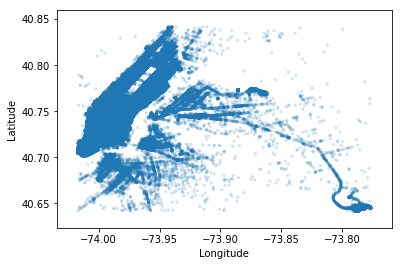

In [290]:
from sklearn.cluster import MiniBatchKMeans
sample_ind = np.random.permutation(len(train))[:500000]
kmeans = MiniBatchKMeans(n_clusters=100, batch_size=1000).fit(np.vstack((train[['pickup_longitude', 'pickup_latitude']].values,\
                                                                       train[['dropoff_longitude', 'dropoff_latitude']].values))[sample_ind])
train.loc[:, 'pickup_cluster'] = kmeans.predict(train[['pickup_longitude', 'pickup_latitude']])
train.loc[:, 'dropoff_cluster'] = kmeans.predict(train[['dropoff_longitude', 'dropoff_latitude']])

In [294]:
len(test)

625134

In [298]:
N = 500000
plt.close()
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(train.pickup_longitude.values[:N], train.pickup_latitude.values[:N], s=10, lw=0, \
           c=train.pickup_cluster[:N].values, cmap='tab20', alpha=0.2)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Cluster based on proximity in train set')
# plt.show()
savefig('map_cluster.eps', dpi = 50)

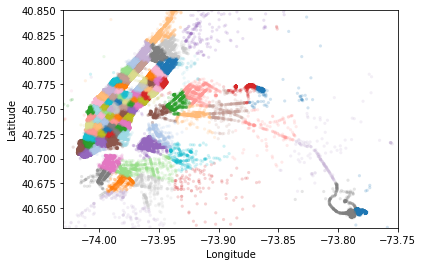

In [301]:
from sklearn.cluster import MiniBatchKMeans
# sample_ind = np.random.permutation(len(test))
# kmeans = MiniBatchKMeans(n_clusters=100, batch_size=1000).fit(np.vstack((train[['pickup_longitude', 'pickup_latitude']].values,\
#                                                                        train[['dropoff_longitude', 'dropoff_latitude']].values, \
#                                                                         validate[['pickup_longitude', 'pickup_latitude']].values,\
#                                                                          validate[['dropoff_longitude', 'dropoff_latitude']].values))[sample_ind])

# validate.loc[:, 'pickup_cluster'] = kmeans.predict(validate[['pickup_longitude', 'pickup_latitude']])
# validate.loc[:, 'dropoff_cluster'] = kmeans.predict(validate[['dropoff_longitude', 'dropoff_latitude']])
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.close()
fig, ax = plt.subplots(ncols=1, nrows=1)
ax.scatter(validate.pickup_longitude.values, validate.pickup_latitude.values, s=10, lw=0, \
           c=validate.pickup_cluster.values, cmap='tab20', alpha=0.2)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()
# savefig('map_cluster_validate.eps', dpi = 50)

In [303]:
train.drop(['pickup_datetime'], axis = 1, inplace = True)
validate.drop(['pickup_datetime'], axis = 1, inplace = True)

In [305]:
list(validate)

['id',
 'vendor_id',
 'passenger_count',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'store_and_fwd_flag',
 'trip_duration',
 'month',
 'hour',
 'weekday',
 'day',
 'quarter',
 'manhattan_dist',
 'manhattan_speed',
 'pickup_long_round',
 'pickup_lat_round',
 'dropoff_long_round',
 'dropoff_lat_round',
 'pickup_cluster',
 'dropoff_cluster']

In [307]:
features = list(set(list(train)) - set(['id','trip_duration', 'pickup_longitude','pickup_latitude',\
                                   'dropoff_longitude','dropoff_latitude', 'manhattan_speed']))

In [308]:
Train = pd.get_dummies(train[features], drop_first = True)
Validate = pd.get_dummies(validate[features], drop_first = True)

In [310]:
features = list(set(list(train)) - set(['id','trip_duration', 'pickup_longitude','pickup_latitude',\
                                   'dropoff_longitude','dropoff_latitude', 'manhattan_speed', 'passenger_count']))

In [19]:
test=dataset
Test = pd.get_dummies(test[features], drop_first= True)

In [311]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 500, criterion = 'mse', max_features = 'auto', random_state = 0, n_jobs = -1)
regressor.fit(Train[features], train['manhattan_speed'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [314]:
y_pred = regressor.predict(Train[features])

In [315]:
y_pred_test = regressor.predict(Validate[features])

In [24]:
y_pred_fin = regressor.predict(Test[['month','day', 'minute', 'manhattan_dist', 'dropoff_lat_round', 'dropoff_long_round', 'hour',\
                    'weekday', 'pickup_long_round', 'store_and_fwd_flag', 'vendor_id', 'pickup_lat_round',\
                    'passenger_count_b', 'passenger_count_c', 'passenger_count_d','passenger_count_e','passenger_count_f',\
                    'passenger_count_g']])
y_pred_fin_ = Test['manhattan_dist'].values/y_pred_fin

In [323]:
N = 6371*3600*math.pi/180.0
y_pred_test_ = N*Validate['manhattan_dist'].values/y_pred_test

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [324]:
np.isnan(y_pred).any()

False

In [325]:
y_pred_ = N*Train['manhattan_dist'].values/y_pred

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [327]:
rmsle(y_pred_test_, validate['trip_duration'] )

0.46786527816079232

In [33]:
submission = pd.DataFrame( y_pred_fin_, columns = [ 'trip_duration'])
submission.loc[:, 'id'] = test['id']
submission = submission[['id', 'trip_duration']]
submission.to_csv('submission.csv', index=False)

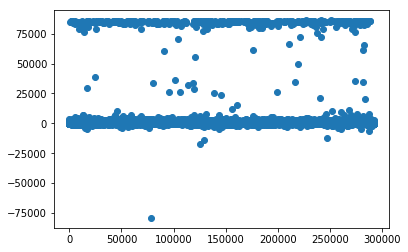

In [330]:
plt.close()

plt.scatter(validate['trip_duration'], validate['trip_duration'] - y_pred_test_)
plt.show()

In [29]:
def rmsle(y_pred, y):
    return np.sqrt(np.mean(np.square(np.log(y_pred+1) - np.log(y+1))))

In [76]:
np.std(np.log1p(dataset['manhattan_speed'].values))

0.46114558902699432

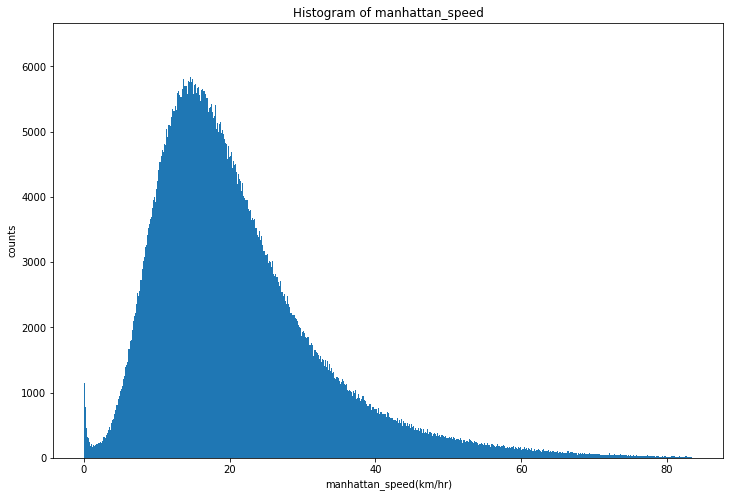

In [155]:
from matplotlib.pyplot import savefig
plt.close()
col = 'manhattan_speed'
f, ax = plt.subplots(figsize=(12,8))
plt.hist(dataset[col].values, bins = 1000)
# plt.axis([0,200, 0, 10000])
plt.title('Histogram of '+col)
plt.xlabel(col + '(km/hr)')
plt.ylabel('counts')
plt.show()
savefig(col+'.eps')

In [164]:
train[train['trip_duration'] == 0.0].index

Int64Index([], dtype='int64')

In [ ]:

plt.close()
f, ax = plt.subplots(figsize=(12,12))
plt.scatter(range(validate.shape[0]), validate['pickup_latitude'])
plt.show()



In [ ]:
plt.close()
f, ax = plt.subplots(figsize=(12,12))
ax = plt.scatter(dataset['pickup_longitude'], dataset['pickup_latitude'])
# plt.xlim((-75, -72))
# plt.ylim((40.4, 42.3))
plt.show()

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="dropoff_longitude", y="manhattan_dist", data=dataset);
plt.show()

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(x="dropoff_longitude", y="manhattan_speed", data=dataset);
plt.show()

In [ ]:
plt.close()
col = 'hour'
plt.scatter(range(len(dataset[col].unique())), dataset.groupby(col).count()[['id']])
plt.show()

In [ ]:
#correlation matrix
import seaborn as sns
corrmat = train[train.select_dtypes(exclude=['object']).columns].corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corrmat, square=True, cmap="YlGnBu", linewidths=.5, annot=False);
plt.show()

In [ ]:
from numpy import where
where(dataset['pickup_long_round'].unique() == -74)

In [ ]:
plt.close()
colx = 'trip_duration'
# print (test[colx].unique())
# print(train.groupby(colx).count()[['Id']]/1460)
fig, ax = plt.subplots(figsize=(15,6))
plt.scatter(np.sort(train[colx])[:-4], range(train.shape[0]-4))
plt.show()
# plt.scatter(train['BsmtQual_num'], train['BsmtCond_num']);

In [ ]:
dataset['day_of_the_year'] = dataset['pickup_datetime'].dt.dayofyear

In [ ]:
list(dataset)
features  = ['id', 'vendor_id', 'pickup_time', 'day_of_the_year', 'distance', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude','dropoff_longitude',\
             'trip_duration']

In [ ]:
#converting month, day of week, day of year, time to cyclic
from numpy import cos, pi
dataset['day_of_year_cos'] = cos(((dataset['day_of_the_year'])/183)*pi)
dataset['pickup_time_cos'] = cos(((dataset['pickup_time'])/(12*3600))*pi)

In [ ]:
df = dataset[features]
df.shape

In [ ]:
#Encoding the string data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
dataset['day_week_cat'] = labelencoder_X_1.fit_transform(dataset['day_week'].values)
onehotencoder = OneHotEncoder(categorical_features = 'all', sparse = False)
W = onehotencoder.fit_transform(dataset['day_week_cat'].values.reshape(-1,1))

In [ ]:
W.shape

In [ ]:
list(df)

In [ ]:
# df is the dataset on which we are going to train
from numpy import hstack, log
list(df)
X = df.iloc[:, 0:9].values
X = hstack((X,W[:,1:]))
y = df.iloc[:, 9].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.decomposition import PCA
# 7 and 9 are latitudes
L = np.vstack((X_train[:, [5, 6]], 
               X_train[:, [7, 8]]))
pca = PCA()
L = pca.fit_transform(L)
# L_pca = pca.transform(L)
# _, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

# sample_ind = np.random.permutation(len(L))[:10000]

# ax1.scatter(X[sample_ind,0], X[sample_ind,1], s=1, lw=0)
# ax1.set_title('Original')

# ax2.scatter(X_pca[sample_ind,0], X_pca[sample_ind,1], s=1, lw=0)
# ax2.set_title('Rotated')

In [ ]:
X_train.shape

In [ ]:
X_train_1 = X_train[:, [5,6,7,8]]
X_test_1 = X_test[:, [5,6,7,8]]

In [ ]:
X_train[:, 5] = pca.transform(X_train_1[:, [0,1]])[:, 0] # pickup_latitude
X_train[:, 6] = pca.transform(X_train_1[:, [0,1]])[:, 1] #pickup_longitude
X_train[:, 7] = pca.transform(X_train_1[:, [2,3]])[:, 0] #dropoff_latitude
X_train[:, 8] = pca.transform(X_train_1[:, [2,3]])[:, 1] #dropoff_longitude

In [ ]:
# apply the pca transform for the test set
X_test[:, 5] = pca.transform(X_test_1[:, [0,1]])[:, 0]
X_test[:, 6] = pca.transform(X_test_1[:, [0,1]])[:, 1]
X_test[:, 7] = pca.transform(X_test_1[:, [2,3]])[:, 0]
X_test[:, 8] = pca.transform(X_test_1[:, [2,3]])[:, 1]

In [ ]:
# dataset['pickup_pca0'] = pca.transform(dataset[['pickup_latitude', 'pickup_longitude']])[:,0]
# dataset['pickup_pca1'] = pca.transform(dataset[['pickup_latitude', 'pickup_longitude']])[:,1]

# dataset['dropoff_pca0'] = pca.transform(dataset[['dropoff_latitude', 'dropoff_longitude']])[:,0]
# dataset['dropoff_pca1'] = pca.transform(dataset[['dropoff_latitude', 'dropoff_longitude']])[:,1]

In [ ]:
# # checking our target Y: trip_duration and plot
from numpy import percentile
q1 = percentile(y_train, 0.001)
q2 = percentile(y_train, 99.999)
keep = [(y_train > q1) & (y_train < q2)]

# plt.close()
# plt.scatter(range(y_train[keep].shape[0]), np.sort( y_train[keep]))
# # plt.xlabel('day')
# plt.ylabel('trip duration')
# plt.show()

In [ ]:
y_train = y_train[keep]
X_train = X_train[keep]

In [ ]:
# q1 = dataset.pickup_longitude.quantile(0.001)
# q2 = dataset.pickup_longitude.quantile(0.999)
# dataset = dataset[(dataset.pickup_longitude > q1) & (dataset.pickup_longitude < q2)]
# # checking our target Y: trip_duration and plot
q1 = percentile(X_train[:,5], 0.01, axis = 0 )
q2 = percentile(X_train[:,5], 99.99, axis = 0)
keep = [(X_train[:, 5] > q1) & (X_train[:, 5] < q2)]

X_train = X_train[keep]
y_train = y_train[keep]
# plt.close()
# plt.scatter(range(X_t.shape[0]), X_t[:,5])
# plt.xlabel('index')
# plt.ylabel('pickup latitude')
# plt.show()

In [ ]:
from numpy import percentile
q1 = percentile(X_train[:,6], 0.001, axis = 0 )
q2 = percentile(X_train[:, 6], 99.999, axis = 0)

keep = [(X_train[:, 6] > q1) & (X_train[:, 6] < q2)]

X_train= X_train[keep]
y_train = y_train[keep]
# X_t.shape
# plt.close()
# plt.scatter(range(X_t.shape[0]), X_t[:,6])
# plt.xlabel('index')
# plt.ylabel('pickup longitude')
# plt.show()

In [ ]:
q1 = percentile(X_train[:,7], 0.01, axis = 0 )
q2 = percentile(X_train[:, 7], 99.99, axis = 0)

keep = [(X_train[:, 7] > q1) & (X_train[:, 7] < q2)]

X_train= X_train[keep]
y_train= y_train[keep]
# # X_t.shape
# plt.close()
# plt.scatter(range(X_t.shape[0]), X_t[:,7])
# plt.xlabel('index')
# plt.ylabel('dropoff latitude')
# plt.show()

In [ ]:
q1 = percentile(X_train[:,8], 0.01, axis = 0 )
q2 = percentile(X_train[:, 8], 99.999, axis = 0)

keep = [(X_train[:, 8] > q1) & (X_train[:, 8] < q2)]

X_train= X_train[keep]
y_train = y_train[keep]
# # X_t.shape
# plt.close()
# plt.scatter(range(X_t.shape[0]), X_t[:,8])
# plt.xlabel('index')
# plt.ylabel('dropoff longitude')
# plt.show()

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train = X_train[:, 1:]

In [ ]:
X_test = X_test[:, 1:]

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train, y = y_train)

In [ ]:
X_test = sc.transform(X_test, y_test)

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.to_csv("df_train.csv")

df_test = pd.DataFrame(X_test)
df_test.to_csv('df_test.csv')

In [ ]:
y_t = (y_train-min(y_train))/(max(y_train)-min(y_train)) 

In [ ]:
y_train = log(y_train)

In [ ]:
import keras
from keras.models import Sequential, load_model #initialising the NN
from keras.layers import Dense #initialising the layers
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasRegressor

In [ ]:
# create model
model = Sequential()
model.add(Dense(units = 9, input_dim=14, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 9, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 9, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(1, kernel_initializer='uniform'))
# Compile model
adam = keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.99, epsilon=1e-08, decay=0)
model.compile(loss='mean_squared_error', optimizer=adam )

In [ ]:
# fitting the Model
model.fit(X_train, y_train, batch_size=200, epochs=50)


In [ ]:
#save the model
model.save('taxi.h5')
model.save_weights('taxi_weights.h5')

In [ ]:
# model = load_weights('taxi_weights.h5')
model = load_model('taxi.h5')
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
from numpy import exp
y_train = exp(y_train)
y_pred_train = exp(y_pred_train)
y_pred_test = exp(y_pred_test)

In [ ]:
rmsle(y_train, y_pred_train)

In [ ]:
def rmsle_np(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

rmsle_np(y_pred_train[:10000], y_train[:10000])

In [ ]:
from numpy import array
y_train = array(y_train)

In [ ]:
import numpy as np
from math import exp
import keras.backend as K
def rmsle(y_true, y_pred):
    first_log = K.log(y_pred + 1.)
    second_log = K.log(y_true + 1.)
    return (K.mean(K.square(first_log - second_log)))**0.5



In [ ]:
# 0.26 mse ==> 0.4646 rmsle 
from numpy import vstack
y_pred = vstack((y_pred_test, y_pred_train))
y_true = hstack((y_test, y_train))
print(str(rmsle(y_train, y_pred_train)))
print(str(rmsle(y_test, y_pred_test)))

In [ ]:
from sklearn.model_selection import KFold
import numpy
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
# fix random seed for reproducibility

seed = 7
numpy.random.seed(seed)
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=200, batch_size=500)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=2, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSLE" % (results.mean(), results.std()))

In [ ]:
def rmsle_np(h, y): 
    """
    Compute the Root Mean Squared Log Error for hypthesis h and targets y
    
    Args:
        h - numpy array containing predictions with shape (n_samples, n_targets)
        y - numpy array containing targets with shape (n_samples, n_targets)
    """
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())
rmsle_np(y_pred_train, y_test)

In [ ]:
# Adding the input layer and the hidden layer with Dropout
# number of nodes in hidden layers or the output of the input layer is taken as the avg of 11 and 1
classifier.add(Dense(units =6, init = 'uniform', activation = 'relu', input_dim = 11))
classifier.add(Dropout(p = 0.1))
classifier.add(Dense(units  =6, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))
# choose softmax instead of sigmoid when there are 3 possible output 
# Also output_dim = 3 in that case.
classifier.add(Dense(units =1, init = 'uniform', activation = 'sigmoid'))

#compiling the network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

# fitting the Model
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

#save the model
classifier.save('banking.h5')
classifier.save_weights('banking_weights.h5')

#test run
classifier1 = load_model('banking.h5')
yaml_string = classifier1.to_yaml()
json_string = classifier1.to_json()

In [ ]:
X_test[1]

In [ ]:
y_pred = classifier1.predict(X_test)

In [ ]:
y_pred = (y_pred>0.5)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# new customer prediction
classifier1.predict(sc.transform(numpy.array([[0,0, 600, 1, 40, 3,  60000, 2, 1, 1, 50000]])))

In [ ]:
from keras.layers import Dropout